In [1]:
!pip3 install tqdm

     |████████████████████████████████| 77 kB 1.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


# import

In [2]:
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

# def fucntion

In [3]:
class MF():
    def __init__(self, k=64):
        self.k = k
        
        self.R = None
        self.P = np.random.normal(loc=0.0, scale=1/k, size=(256, self.k))
        self.Q = np.random.normal(loc=0.0, scale=1/k, size=(256, self.k))


    def train(self, R, reg_lambda, lr_alpha, max_iterations, epsilon):
        self.R = np.array(R)

        for iteration in tqdm(range(max_iterations)):
            for i in range(256):
                for j in range(256):
                    if self.R[i][j] > 0:
                        error = self.R[i][j] - np.dot(self.P[i, :], self.Q[j, :].T)
                        self.P[i, :] += lr_alpha * (2 * error * self.Q[j, :] - 2 * reg_lambda * self.P[i, :])
                        self.Q[j, :] += lr_alpha * (2 * error * self.P[i, :] - 2 * reg_lambda * self.Q[j, :])

            reconst_R = np.dot(self.P, self.Q.T)
            error_matrix = self.R - reconst_R
            error = np.sum(np.square(error_matrix))

            if error < epsilon:
                break

        return 1

    def P_MultipliedBy_Q_Transpose(self):
        reconst_R = np.dot(self.P, self.Q.T)
        return reconst_R


In [4]:
def image_load(img_name):
    # Use a breakpoint in the code line below to debug your script.
    pic = Image.open(img_name)
    pix_mat = np.array(pic)
    return pix_mat

In [5]:
def print_img(pixel_mat):
    plt.figure()
    plt.imshow(pixel_mat)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [6]:
def print_img_list(original, corrupted, reconsted, c_rate):
    plt.figure(figsize=(10, 3))

    plt.subplot(1, 3, 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(original, cmap=plt.cm.binary)
    plt.xlabel("original")

    plt.subplot(1, 3, 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(corrupted, cmap=plt.cm.binary)
    label_format = "corrupted (rate: {c_rate:.2f})"
    label_str = label_format.format(c_rate=c_rate)
    plt.xlabel(label_str)

    plt.subplot(1, 3, 3)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(reconsted, cmap=plt.cm.binary)
    plt.xlabel("reconsted")

    plt.show()

# Test

## Hyper Parameter

In [65]:
k = 64
reg_lambda = 0.0

lr_alpha = 0.1
max_iterations = 100
epsilon = 0.01

zero: 39446, minus:0, plus: 26090
train_start


100%|██████████| 100/100 [00:48<00:00,  2.08it/s]

train_end


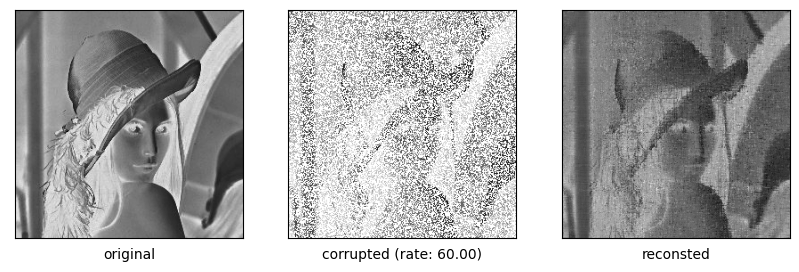

In [66]:
random.seed(0)
original_pixels = image_load("./Lena_00c.png")

corruption_rate = 60.0
corrupted_pixels = image_load("./Lena_60c.png")
corrupted_pixels = corrupted_pixels / 255

zero_pixels = 0
minus_pixels = 0
plus_pixels = 0

pixels_shape = original_pixels.shape
for i in range(pixels_shape[0]):
    for j in range(pixels_shape[1]):
        value = corrupted_pixels[i][j]
        if value == 0:
            zero_pixels += 1
        elif value < 0:
            minus_pixels += 1
        else:
            plus_pixels += 1

print("zero: %d, minus:%d, plus: %d" % (zero_pixels, minus_pixels, plus_pixels))

mf = MF(k=k)
print("train_start")
mf.train(R=corrupted_pixels, reg_lambda=reg_lambda, lr_alpha=lr_alpha, max_iterations=max_iterations, epsilon=epsilon)
print("train_end")
reconst_pixels = mf.P_MultipliedBy_Q_Transpose()

if reconst_pixels is None:
    print("MF is not yet implemented.")
else:
    print_img_list(original_pixels, corrupted_pixels, reconst_pixels, corruption_rate)